Bi and Bii

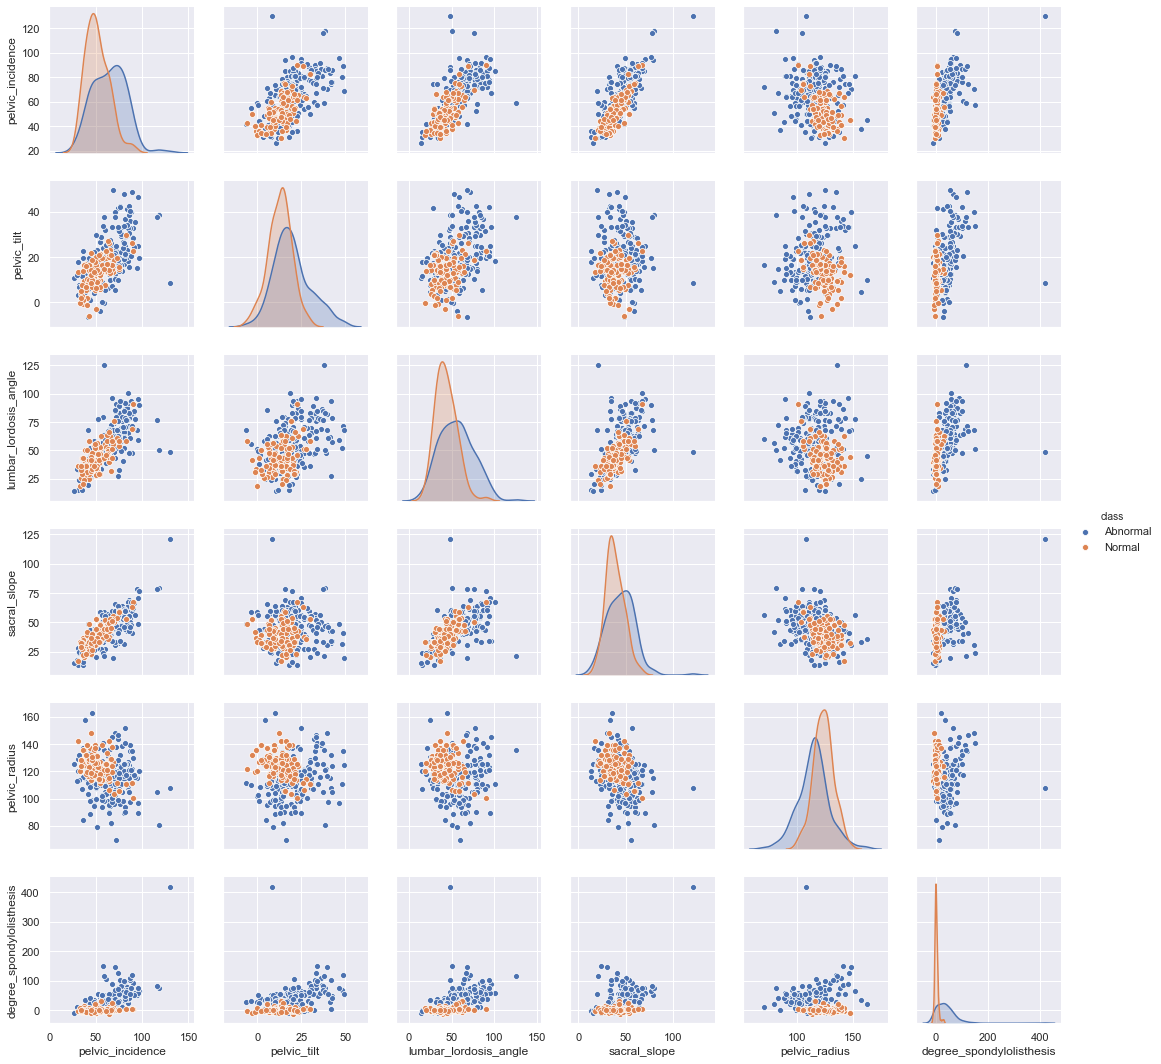

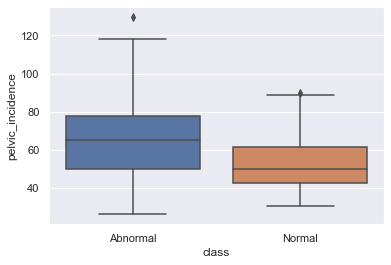

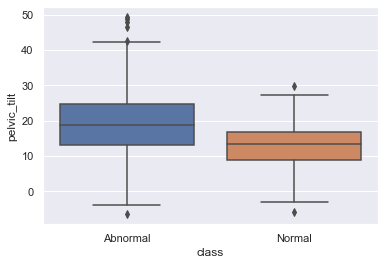

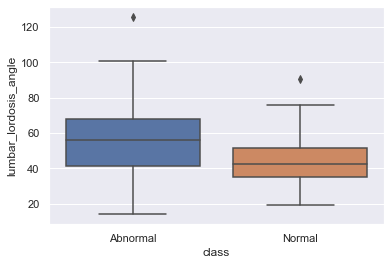

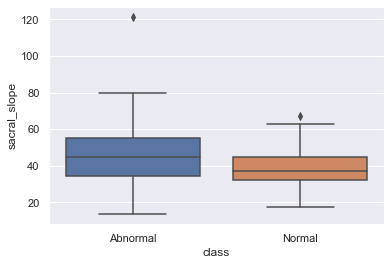

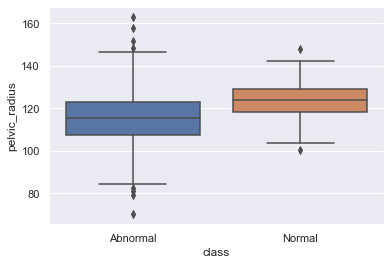

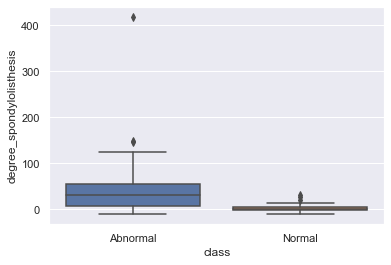

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import sklearn
    
risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
sns.set()
graph = sns.pairplot(risk,hue = "class")
plt.show()


graph1 = sns.boxplot(data=risk,x="class",y="pelvic_incidence")
plt.show()
graph2 = sns.boxplot(data=risk,x="class",y="pelvic_tilt")
plt.show()
graph3 = sns.boxplot(data=risk,x="class",y="lumbar_lordosis_angle")
plt.show()
graph4 = sns.boxplot(data=risk,x="class",y="sacral_slope")
plt.show()
graph5 = sns.boxplot(data=risk,x="class",y="pelvic_radius")
plt.show()
graph6 = sns.boxplot(data=risk,x="class",y="degree_spondylolisthesis")
plt.show()

Biii

In [10]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# import pandas as pd
# from sklearn.model_selection import train_test_split,cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# import sklearn

risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
dataset = np.array(risk)

ab_dataset = dataset[np.where(dataset[:,6]=='Abnormal')]
no_dataset = dataset[np.where(dataset[:,6]=='Normal')]

ab_dataset_train = ab_dataset[0:140,:]    #异常数据，训练用 1
no_dataset_train = no_dataset[0:70,:]     #正常数据，训练用 0
train_dataset = np.vstack((ab_dataset_train,no_dataset_train))     #生成总的训练数据

ab_dataset_test = ab_dataset[140:,:]    #异常数据，测试用
no_dataset_test = no_dataset[70:,:]     #正常数据，测试用
test_dataset = np.vstack((ab_dataset_test,no_dataset_test))       #生成总的测试数据

y_test = np.array([1 if i == 'Abnormal' else 0 for i in test_dataset[:,6]])
X_test = test_dataset[:,0:6]

Ci   

In [11]:
print('use a software package')

use a software package


Cii

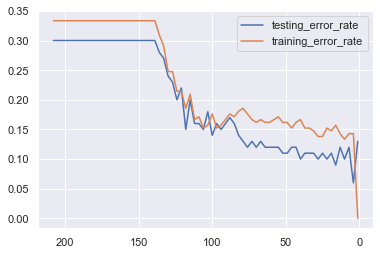

best k: 4
confusion matric:
[[69  1]
 [ 5 25]]
true positive rate: 0.9857142857142858
true negative rate: 0.8333333333333334
Precision: 0.9324324324324325
F_score: 0.9583333333333333


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import sklearn



risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
dataset = np.array(risk)


# X = dataset[:, :6]
# y_all_data = dataset[:, 6]
# y = np.array([1 if i == 'Abnormal' else 0 for i in y_all_data])
#
#
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=666)

risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
dataset = np.array(risk)



ab_dataset = dataset[np.where(dataset[:,6]=='Abnormal')]
no_dataset = dataset[np.where(dataset[:,6]=='Normal')]


ab_dataset_train = ab_dataset[0:140,:]    #异常数据，训练用 1
no_dataset_train = no_dataset[0:70,:]     #正常数据，训练用 0
train_dataset = np.vstack((ab_dataset_train,no_dataset_train))     #生成总的训练数据

ab_dataset_test = ab_dataset[140:,:]    #异常数据，测试用
no_dataset_test = no_dataset[70:,:]     #正常数据，测试用
test_dataset = np.vstack((ab_dataset_test,no_dataset_test))       #生成总的测试数据

y_test = np.array([1 if i == 'Abnormal' else 0 for i in test_dataset[:,6]])
X_test = test_dataset[:,:6]

y_train = np.array([1 if i == 'Abnormal' else 0 for i in train_dataset[:,6]])
X_train = train_dataset[:,:6]



knn_range2 = []
k_number = []
knn_range = []
best_k = 0
best_score = 6
k_1 = 1
k_2 = 209
k_3 = 3
#knn = KNeighborsClassifier(n_neighbors=1)
#knn.fit(X_trian, y_train)  # 导入数据进行训练



for k in range(208, 0, -3):
    k_number = k_number + [k]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    per_score = knn.score(X_test,y_test)
    per_score = 1-per_score
    per_score2 = knn.score(X_train,y_train)
    per_score2 = 1-per_score2
    # print(knn.score(X_test,y_test))
    knn_range = knn_range + [per_score]
    knn_range2 = knn_range2 +[per_score2]
    if best_score>per_score:
        best_score = per_score                       #k最优值对应的精确度
        best_k = k   #k最优值




k_number_2 = np.array(k_number)
knn_range_2 = np.array(knn_range)
knn_range2_2 = np.array(knn_range2)


plt.plot(k_number_2, knn_range_2, label='testing_error_rate')                 #形成k及其精确度的图表
plt.plot(k_number_2, knn_range2_2, label='training_error_rate')
plt.gca().invert_xaxis()
plt.legend()
plt.show()
print('best k:',best_k)

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
predict_y_test = best_knn.predict(X_test)
true_y_test = y_test
C = sklearn.metrics.confusion_matrix(true_y_test,predict_y_test,labels=[1,0])      #用best _k的预测数据和真实数据得到混淆矩阵


TP = C[0][0]
FP = C[1][0]
TN = C[1][1]
FN = C[0][1]


print('confusion matric:')
print(C)

true_positive_rate = TP/(TP+FN)    #True positive rate = true positive / (true positive + false positive)
true_negative_rate = TN/(FP+TN)     #True negative rate = true negative / (true negative + false negative)
print('true positive rate:',true_positive_rate)
print('true negative rate:',true_negative_rate)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_score = 2*Precision*Recall/(Precision+Recall)
print('Precision:',Precision)
print('F_score:',F_score)

Ciii

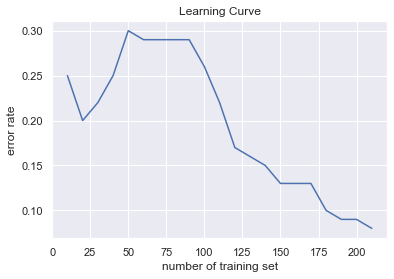

In [13]:
# from matplotlib import pyplot as plt

# import pandas as pd
# from sklearn.model_selection import train_test_split,cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# import sklearn

risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
dataset = np.array(risk)



ab_dataset = dataset[np.where(dataset[:,6]=='Abnormal')]
no_dataset = dataset[np.where(dataset[:,6]=='Normal')]


ab_dataset_train = ab_dataset[0:140,:]    #异常数据，训练用 1
no_dataset_train = no_dataset[0:70,:]     #正常数据，训练用 0
train_dataset = np.vstack((ab_dataset_train,no_dataset_train))     #生成总的训练数据

ab_dataset_test = ab_dataset[140:,:]    #异常数据，测试用
no_dataset_test = no_dataset[70:,:]     #正常数据，测试用
test_dataset = np.vstack((ab_dataset_test,no_dataset_test))       #生成总的测试数据

y_test = np.array([1 if i == 'Abnormal' else 0 for i in test_dataset[:,6]])
X_test = test_dataset[:,0:6]




def best(k_1,k_2,k_3):
    good_error_rate = 5
    best_best_k = 0
    for k in range(k_1,k_2,k_3):
        best_knn = KNeighborsClassifier(n_neighbors=k)
        best_knn.fit(X_train, y_train)
        predict_y_test = best_knn.predict(X_test)
        true_y_test = y_test

        C = sklearn.metrics.confusion_matrix(true_y_test, predict_y_test, labels=[1,0])  # 用best _k的预测数据和真实数据得到混淆矩阵

        TP = C[0][0]
        FP = C[1][0]
        TN = C[1][1]
        FN = C[0][1]

        error_rate = (FP+FN)/(TP+TN+FP+FN)
        if good_error_rate > error_rate:
            good_error_rate=error_rate
            best_best_k=k
    return good_error_rate,best_best_k


N_error = []
N_k = []
N_range = []

for N in range(10,211,10):
    c = N-N//3
    d = N//3
    choose_normal = no_dataset_train[:d,:]           #N行class0
    choose_abnormal = ab_dataset_train[:c,:]          #N-N//3 行class1
    N_dataset = np.vstack((choose_normal,choose_abnormal))
    X_train = N_dataset[:,:6]
    y_train_unchange = N_dataset[:,6]
    y_train = np.array([1 if i == 'Abnormal' else 0 for i in y_train_unchange])
    a,b = best(1,N,5)
    N_error = N_error+[a]
    N_k = N_k+[b]
    N_range =N_range+[N]

N_error_ok = np.array(N_error)               #最小错误率集合
N_k_ok = np.array(N_k)                     #最优k值集合
N_range = np.array(N_range)               #N值集合
# plt.plot(N_range,N_k)
# plt.show()
plt.plot(N_range,N_error_ok)
plt.title('Learning Curve')
plt.xlabel('number of training set')
plt.ylabel('error rate')
plt.show()



D

In [17]:
# from matplotlib import pyplot as plt

# import pandas as pd
# from sklearn.model_selection import train_test_split,cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# import sklearn
# from sklearn.metrics import *
# import math






risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
dataset = np.array(risk)

ab_dataset = dataset[np.where(dataset[:,6]=='Abnormal')]
no_dataset = dataset[np.where(dataset[:,6]=='Normal')]

ab_dataset_train = ab_dataset[0:140,:]    #异常数据，训练用 1
no_dataset_train = no_dataset[0:70,:]     #正常数据，训练用 0
train_dataset = np.vstack((ab_dataset_train,no_dataset_train))     #生成总的训练数据

ab_dataset_test = ab_dataset[140:,:]    #异常数据，测试用
no_dataset_test = no_dataset[70:,:]     #正常数据，测试用
test_dataset = np.vstack((ab_dataset_test,no_dataset_test))


X_train = train_dataset[:,:6]
y_train_unchange = train_dataset[:,6]
y_train = np.array([1 if i == 'Abnormal' else 0 for i in y_train_unchange])
X_test = test_dataset[:,:6]
y_test_unchange = test_dataset[:,6]
y_test = np.array([1 if i == 'Abnormal' else 0 for i in y_test_unchange])




def best_k(way,value_p):
    good_error_rate = 5
    best_best_k = 0
    for k in range(1,197,5):
        best_knn = KNeighborsClassifier(n_neighbors=k,p=value_p,metric=way)
        best_knn.fit(X_train, y_train)
        predict_y_test = best_knn.predict(X_test)
        true_y_test = y_test

        C = sklearn.metrics.confusion_matrix(true_y_test, predict_y_test, labels=[1,0])  # 用best _k的预测数据和真实数据得到混淆矩阵

        TP = C[0][0]
        FP = C[1][0]
        TN = C[1][1]
        FN = C[0][1]

        #error_rate = (FP+FN)/(TP+TN+FP+FN)
        error_rate = 1-(best_knn.score(X_test,y_test))
        if good_error_rate >= error_rate:
            good_error_rate=error_rate
            best_best_k=k

    return good_error_rate,best_best_k

a,b = best_k('minkowski',1)
print('best error is',a)
print('best k is',b)








'''第二小题'''


best_error = 10
best_p = 0

for c in range(10,101,10):                       #x=logaN      a**x=N
    best_knn = KNeighborsClassifier(n_neighbors=26, p=(10**(c/100)), metric='minkowski')
    best_knn.fit(X_train, y_train)
    predict_y_test = best_knn.predict(X_test)
    true_y_test = y_test

    C = sklearn.metrics.confusion_matrix(true_y_test, predict_y_test, labels=[1, 0])  # 用best _k的预测数据和真实数据得到混淆矩阵

    TP = C[0][0]
    FP = C[1][0]
    TN = C[1][1]
    FN = C[0][1]

    error_rate = (FP + FN) / (TP + TN + FP + FN)


    if best_error>error_rate:
        best_error = error_rate
#        best_p = 10**(c/100)
        best_c = c/100

print('Best error is',best_error)
print('Best log10(p) =',best_c)




'''第三小题'''
a,b = best_k('minkowski',np.inf)
print('Best error is',a)
print('Best k is',b)




X_train = X_train.astype('float')

'''d第二大题'''
good_error_rate = 5
best_best_k = 0
error_list = []
k_list = []
for k in range(1, 197, 5):
    best_knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric="mahalanobis",\
                                    metric_params = {'V':np.linalg.inv(np.cov(X_train))}, algorithm="brute")
    best_knn.fit(X_train, y_train)
    predict_y_test = best_knn.predict(X_test)
    true_y_test = y_test
    knn_score = best_knn.score(X_test,y_test)

    C = sklearn.metrics.confusion_matrix(true_y_test, predict_y_test, labels=[1, 0])  # 用best _k的预测数据和真实数据得到混淆矩阵

    TP = C[0][0]
    FP = C[1][0]
    TN = C[1][1]
    FN = C[0][1]
    error_rate = (FP + FN) / (TP + TN + FP + FN)
    if good_error_rate >= error_rate:
        good_error_rate = error_rate
        best_best_k = k
    error_list = error_list+[error_rate]
    k_list = k_list+[k]
print('Best error is',good_error_rate)
print('Best k is ',best_best_k)

best error is 0.10999999999999999
best k is 26
Best error is 0.1
Best log10(p) = 0.1
Best error is 0.07999999999999996
Best k is 16
Best error is 0.15
Best k is  6


### summarized data in table
| Distance method| Metrics| Best test error rate
| :------: | :------: | :------: |
| Mahanttan Distance | k = 26 | 0.11
| Mahanttan Distance(log10(p) ∈ {0.1, 0.2...0.1})(log10(p)=0.1) | k = 26 | 0.1
| Chebyshev Distance | k = 16 | 0.08
| Mahalanobis Distance | k = 6 | 0.15

E

In [15]:
# from matplotlib import pyplot as plt

# import pandas as pd
# from sklearn.model_selection import train_test_split,cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# import sklearn
from sklearn.metrics import *
import math






risk = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework1/colunm.csv')
dataset = np.array(risk)

ab_dataset = dataset[np.where(dataset[:,6]=='Abnormal')]
no_dataset = dataset[np.where(dataset[:,6]=='Normal')]

ab_dataset_train = ab_dataset[0:140,:]    #异常数据，训练用 1
no_dataset_train = no_dataset[0:70,:]     #正常数据，训练用 0
train_dataset = np.vstack((ab_dataset_train,no_dataset_train))     #生成总的训练数据

ab_dataset_test = ab_dataset[140:,:]    #异常数据，测试用
no_dataset_test = no_dataset[70:,:]     #正常数据，测试用
test_dataset = np.vstack((ab_dataset_test,no_dataset_test))


X_train = train_dataset[:,:6]
y_train_unchange = train_dataset[:,6]
y_train = np.array([1 if i == 'Abnormal' else 0 for i in y_train_unchange])
X_test = test_dataset[:,:6]
y_test_unchange = test_dataset[:,6]
y_test = np.array([1 if i == 'Abnormal' else 0 for i in y_test_unchange])




def best_k(way,value_p):
    good_error_rate = 5
    best_best_k = 0
    for k in range(1,197,5):
        best_knn = KNeighborsClassifier(n_neighbors=k,p=value_p,metric=way,weights='distance')
        best_knn.fit(X_train, y_train)
        predict_y_test = best_knn.predict(X_test)
        true_y_test = y_test

        C = sklearn.metrics.confusion_matrix(true_y_test, predict_y_test, labels=[1,0])  # 用best _k的预测数据和真实数据得到混淆矩阵

        TP = C[0][0]
        FP = C[1][0]
        TN = C[1][1]
        FN = C[0][1]

        error_rate = (FP+FN)/(TP+TN+FP+FN)

        if good_error_rate > error_rate:
            good_error_rate=error_rate
            best_best_k=k

    return good_error_rate,best_best_k

a,b = best_k('minkowski',2)
print('best error of Euclidean metric is',a)
print('best k is',b)


a,b = best_k('minkowski',1)
print('best error of manhattan metric is',a)
print('best k is',b)


'''第三小题'''
a,b = best_k('minkowski',np.inf)
print('Best error of chebyshev metric is',a)
print('Best k is',b)


best error of Euclidean metric is 0.1
best k is 6
best error of manhattan metric is 0.1
best k is 26
Best error of chebyshev metric is 0.11
Best k is 16


### summarized data in table
| Distance method| Metrics| Best test error rate
| :------: | :------: | :------: |
| Euclidean Distance | k = 6 | 0.1
| Mahanttan Distance | k = 26 | 0.1
| Chebyshev Distance | k = 16 | 0.11


F

In [16]:
print('the best error rate is 0',)

the best error rate is 0
